### What we'll be doing:
In this project, we will do the following:

1. Download mushroom field guide data and clean the data up (Part I)
2. Perform exploratory data analysis (Part II)
3. Apply machine learning techniques to train a model to predict mushroom edibility (Part III)
4. Visualize a decision tree 


<div style="background-color: #78E8A3; padding: 20px">
<h3>Project Scenario</h3>
<p>You're preparing to trek a forest soon.</p>
<p>You enjoy mushrooms a lot, and anticipate them appearing during your trek. But you know that some are more edible than others, and some are just downright poisonous.</p> 
<p>Luckily for you, you remember that there's a field guide containing mushroom information, but you prefer to use train a model to tell you whether the mushroom is poisonous.</p>
<p>In this project, you will use the field guide data to do exactly that, and hope that the model is 100% accurate.</p> 
</div>

### Step 1: Import pandas as pd
First up, import pandas as pd to work with the tabular data.

In [1]:
# Step 1: Import pandas
import pandas as pd

### Step 2: Download mushroom data
We'll be getting our data from the <a href='https://archive.ics.uci.edu/ml/datasets/Mushroom'>UCI Machine Learning Repository</a>. 

More specifically, the data is submitted by the Audobon Society Field Guide, a nature reference. 

Download the data <a href = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/'>here</a>. You will need only two files:
1. agarious-lepiota.data
2. agarious-lepiota.names

If the server is down, click <a href = 'https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectMushroom/MushroomFiles.zip'>here</a> to download the zipped files.

### Step 3: Read agaricus-lepiota.names with a text editor
Firstly, read the agaricus-lepiota.names with a text editor. A few things you can use with:
1. Notepad
2. Notepad++
3. Microsoft Word

You'll see something like this:
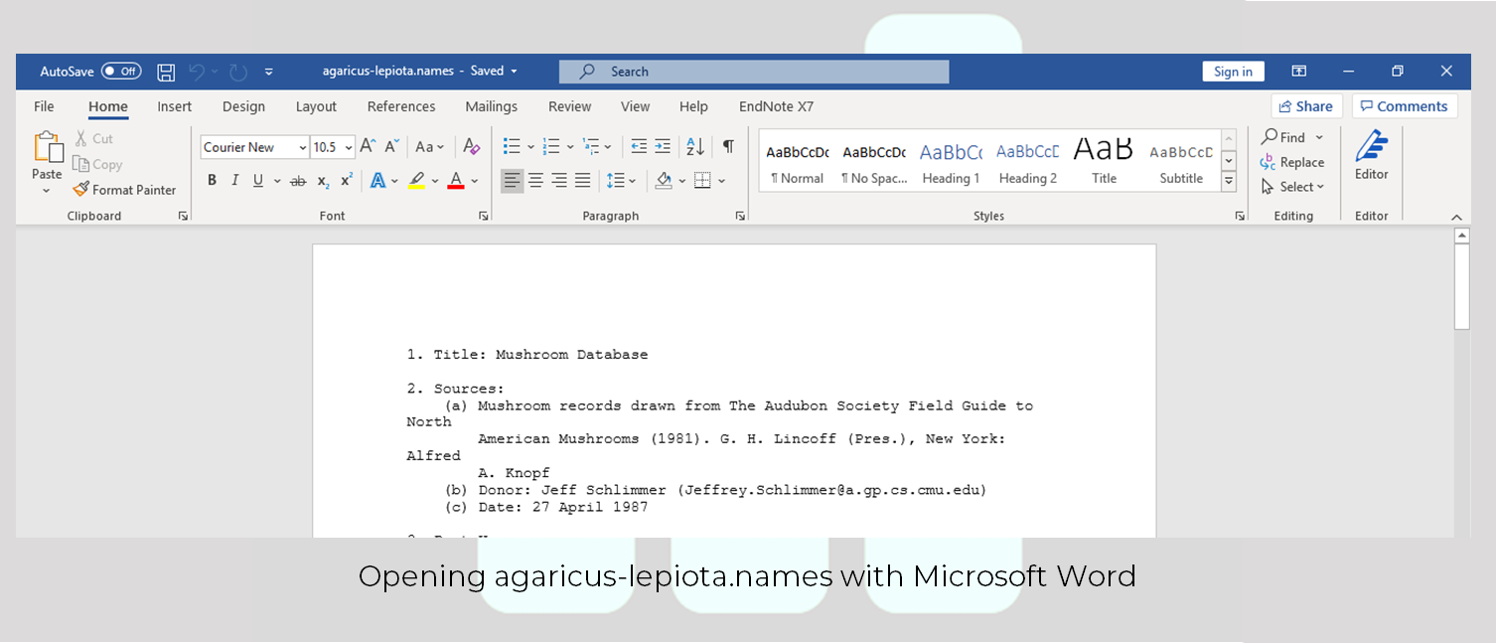

It's importance to read this document since it clarifies what you will see in agaricus-lepiota.data, i.e. the columns and values in each column.

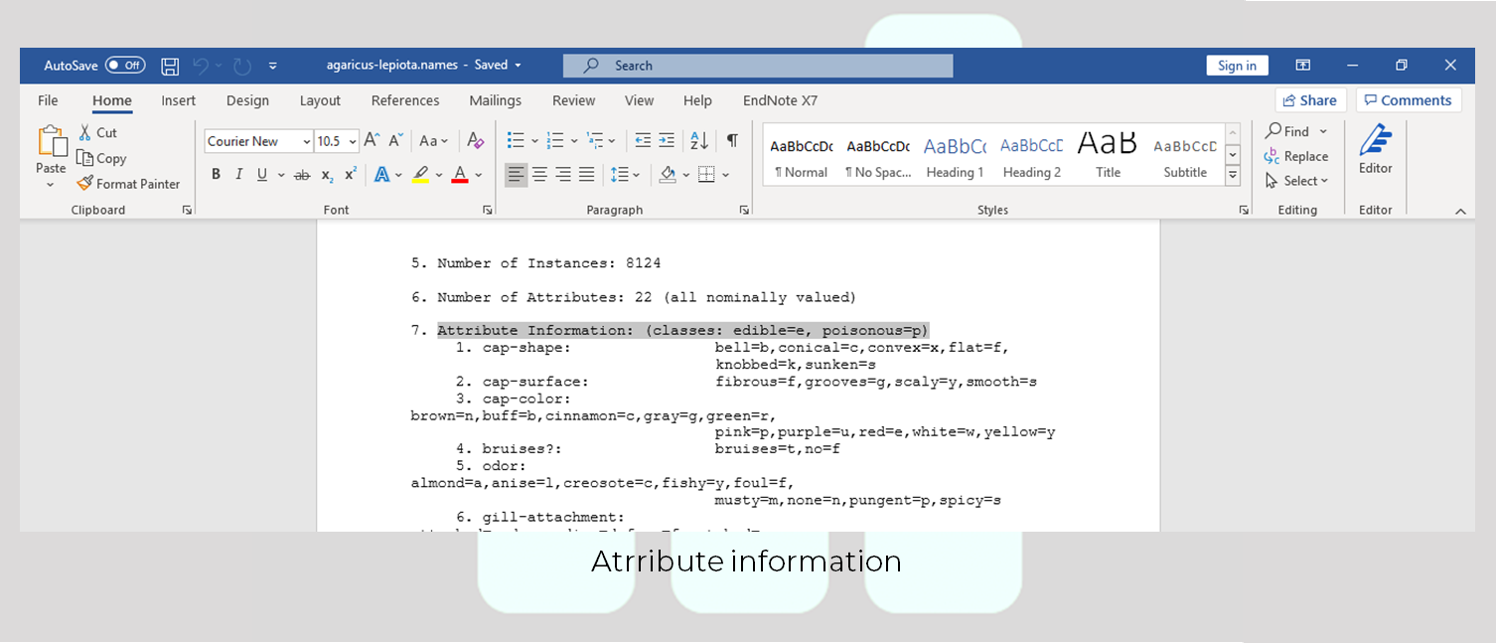

### Step 4: Read agaricus-lepiota.data into a DataFrame
Treat agaricus-lepiota.data like a CSV, and read it into a DataFrame.

The data does not have any column information, so take note to put None in your <strong>header</strong> parameter when you read the csv.

Sanity check:
1. 8,124 rows
2. 23 columns

In [2]:
# Step 4: Read agaricus-lepiota.data 
df_data = pd.read_csv(r'C:\TechCareer\DA\00 Project\UpLevelProjectMushroomEdibility\agaricus-lepiota.data', header = None)
df_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Step 5: Rename your columns
As mentioned, the data does not have any column names, so we will give it one.

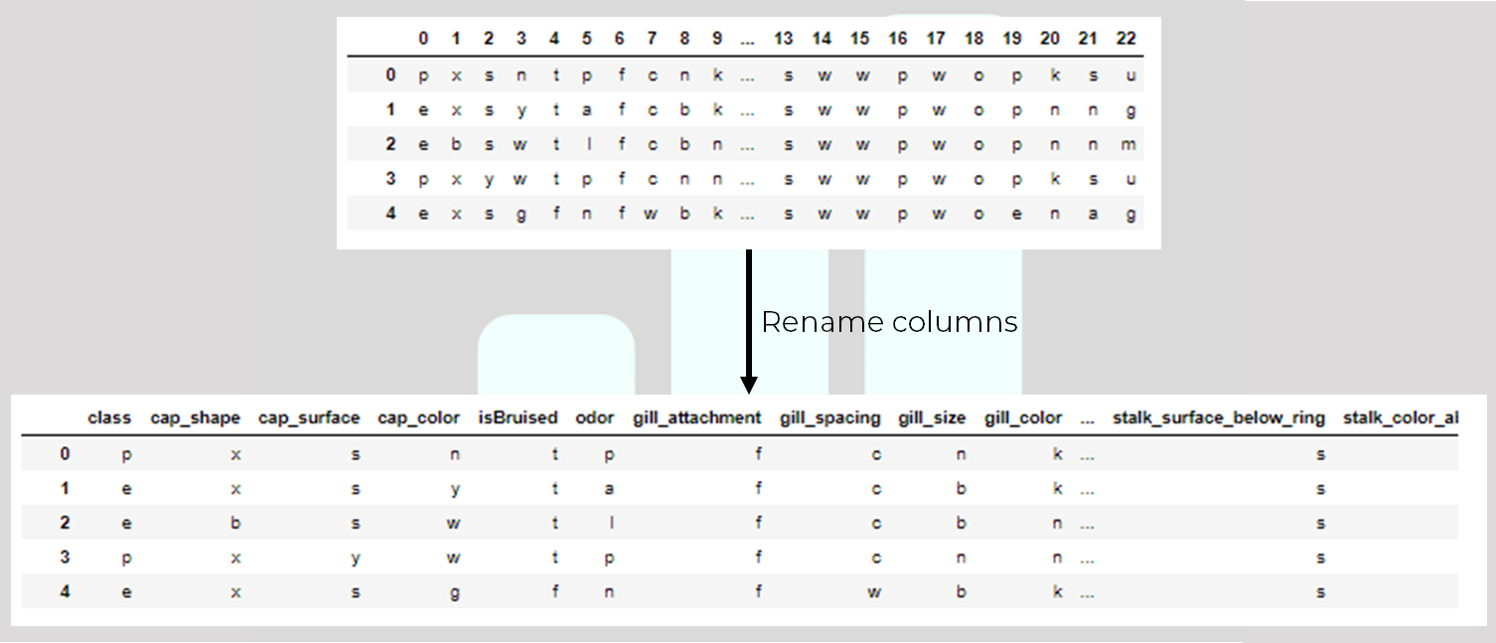

With reference to agaricus-lepiota.names, we will rename the columns in the following name and order:
1. class
2. cap_shape
3. cap_surface
4. cap_color
5. isBruised
6. odor
7. gill_attachment
8. gill_spacing
9. gill_size
10. gill_color
11. stalk_shape
12. stalk_root
13. stalk_surface_above_ring
14. stalk_surface_below_ring
15. stalk_color_above_ring
16. stalk_color_below_ring
17. veil_type
18. veil_color
19. ring_number
20. ring_type
21. spore_print_color
22. population
23. habitat

Prepare a list containing these strings in order, and set it to your DataFrame's .columns attribute.

In [3]:
# Step 5: Give your DataFrame column names
columns_name = ['class', 
                'cap_shape',
                'cap_surface',
                'cap_color',
                'isBruised',
                'odor',
                'gill_attachment',
                'gill_spacing',
                'gill_size',
                'gill_color',
                'stalk_shape',
                'stalk_root',
                'stalk_surface_above_ring',
                'stalk_surface_below_ring',
                'stalk_color_above_ring',
                'stalk_color_below_ring',
                'veil_type',
                'veil_color',
                'ring_number',
                'ring_type',
                'spore_print_color',
                'population',
                'habitat']


In [4]:
df_data.columns = columns_name
df_data

,class,cap_shape,cap_surface,cap_color,isBruised,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Step 6: Export your DataFrame into a CSV
There we have it - we have given our dataset proper column names. 

Let's export this into a CSV for subsequent analysis in Parts II and III. 

In [5]:
# Step 6: Export your DataFrame into a CSV
df_data.to_csv('data.csv',index=False)

## Part II
### Step 1: Import the following libraries
- pandas
- matplotlib.pyplot as plt
- seaborn as sns

In [6]:
# Step 1: Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Read the CSV from Part I as DataFrame
We will read our CSV from Part I into a DataFrame.

Sanity check:
1. 8,124 rows
2. 23 columns

In [7]:
# Step 2: Read the CSV from Part I
df = pd.read_csv('data.csv')
df

,class,cap_shape,cap_surface,cap_color,isBruised,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Step 3: Plot 'class' column with a countplot
We'll first look at the most important column - 'class'. 

'p' stands for poisonous, and 'e' for edible.

We'll plot a countplot to assess the frequency and proportion of the values. 

This is what you'll see if you plot it correctly:

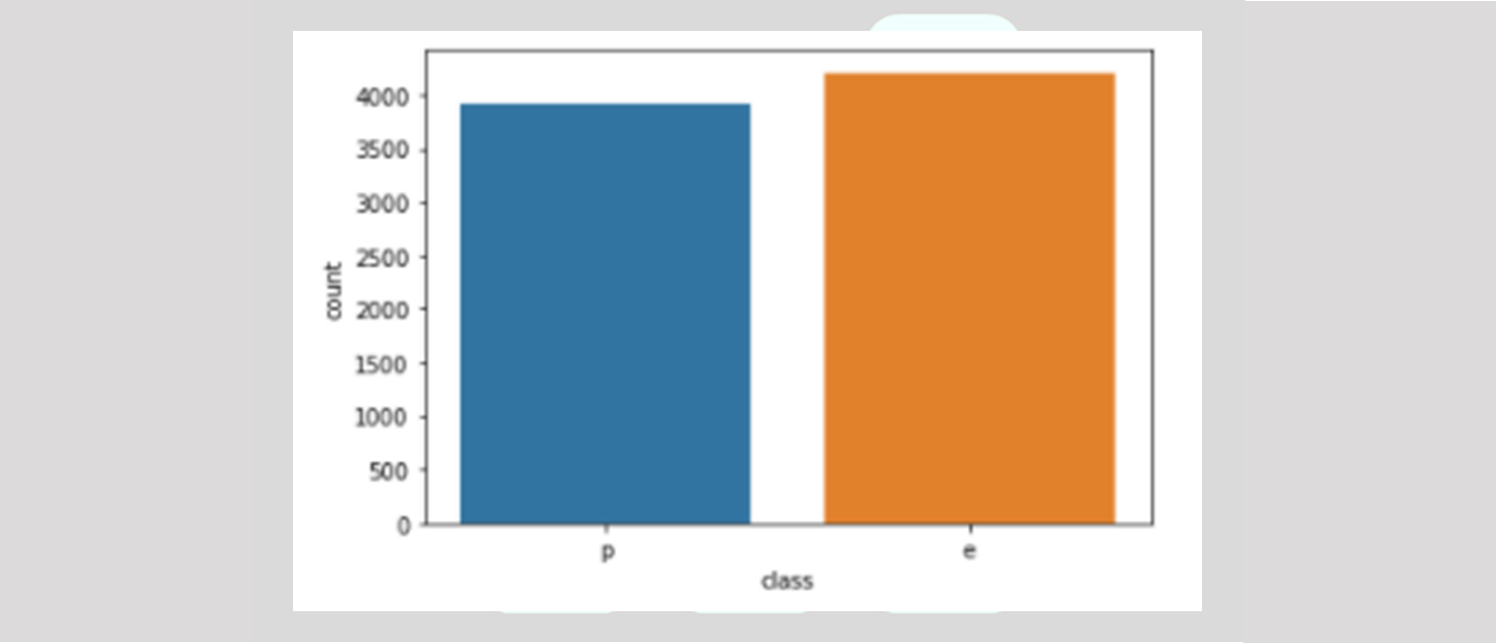



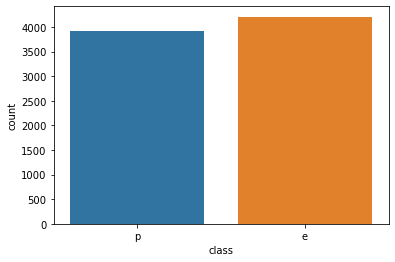

In [8]:
# Step 3: Plot a countplot with the 'class' column
sns.countplot(x ='class', data = df)
plt.show()

### Step 4: Plot a countplot for cap_shape
Next up, let's plot a countplot for cap_shape.

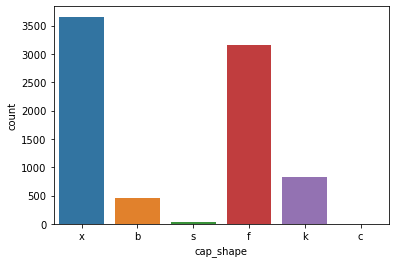

In [9]:
# Step 4: Plot a countplot for cap_shape
sns.countplot(x ='cap_shape', data = df)
plt.show()

### Step 5: Plot a countplot for 'cap_shape' with 'class' as hue
Now that we have done individual countplots for class and cap_shape, time to combine them into one. 

More specifically, this is what we're asking:

<blockquote>What is the proportion of edible and poisonous mushrooms in each kind of cap?</blockquote>

We anticipate something like this when we plot it:

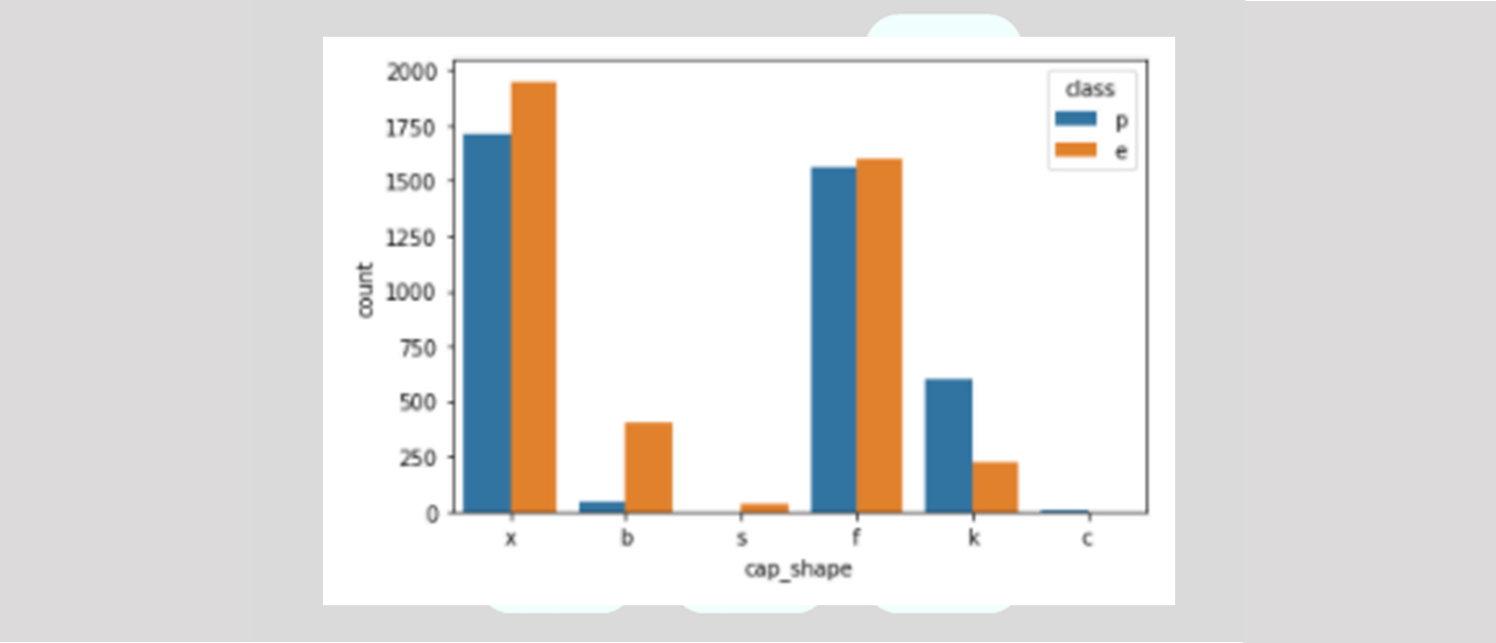



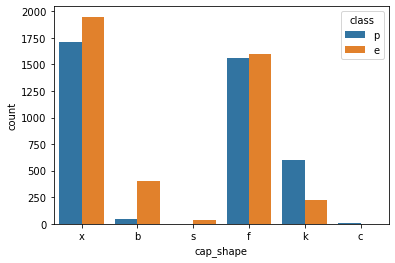

In [10]:
# Step 5: Plot countplot for cap_shape with class as hue
sns.countplot(x="cap_shape", hue="class", data = df)

plt.show()

### Step 6: Loop through the columns and plot columns with 'class' as hue
From the countplot with class as hue, you can see some interesting observations. For example:
1. There are more edible mushrooms with b cap shape (bell), than poisonous ones
2. There are no poisonous mushrooms with s cap shape (sunken)

However, it's gonna be tedious to go through all of the columns to plot a countplot. 

As such, consider using a for loop to plot the countplots in succession.

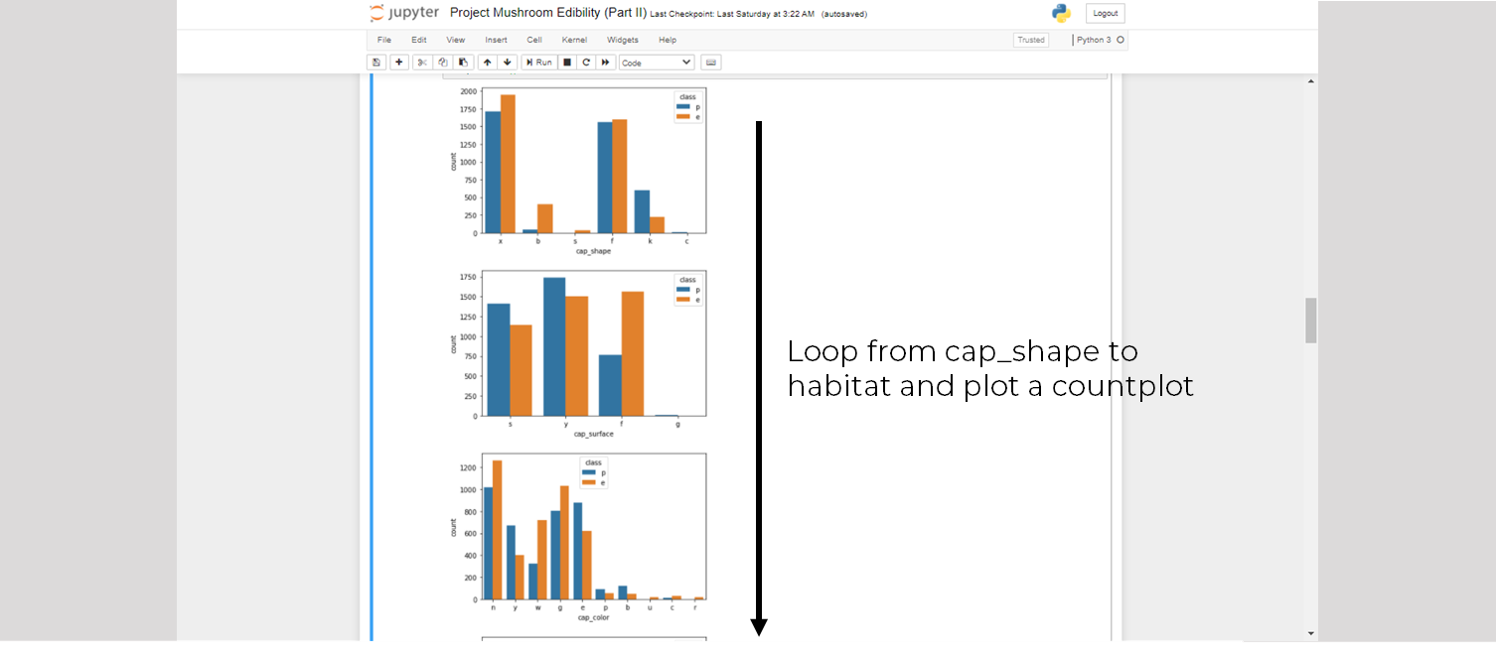

<strong>Hint: When looping, don't forget plt.show() at the end of the loop so that you will show a new plot in each loop, rather than combining everything into a single plot.</strong>

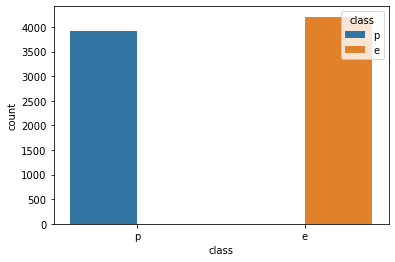

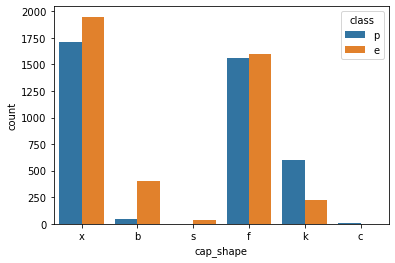

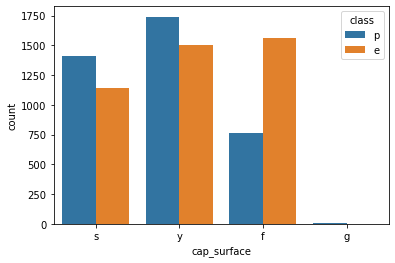

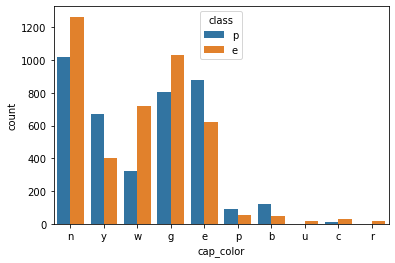

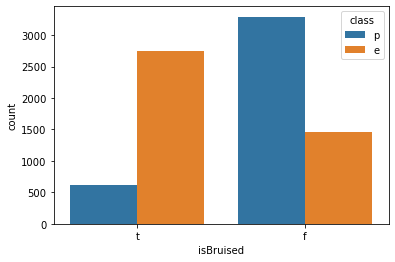

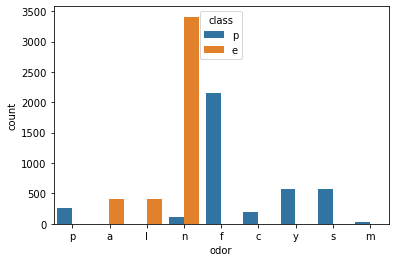

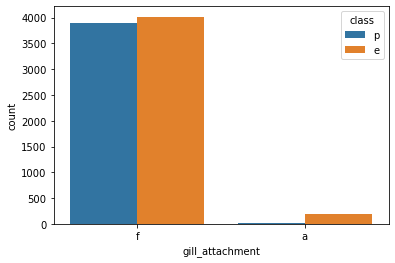

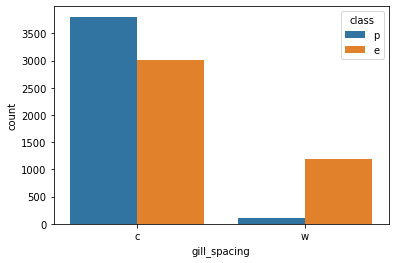

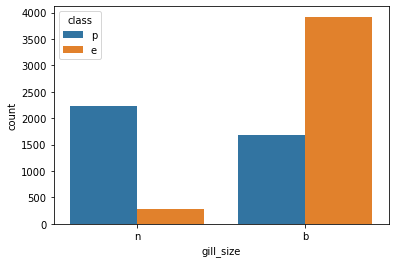

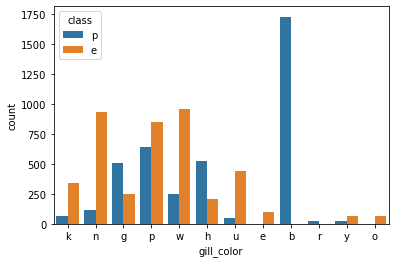

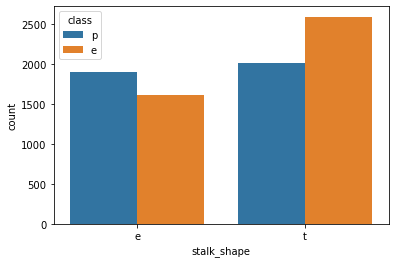

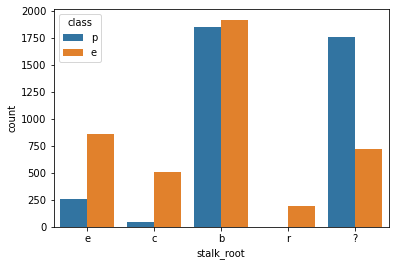

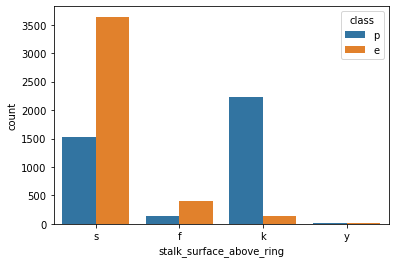

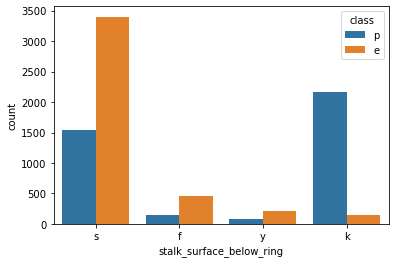

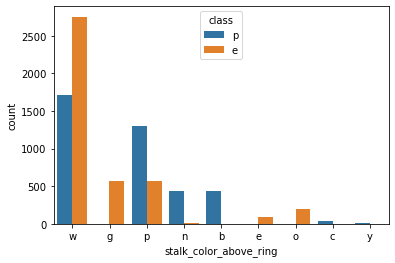

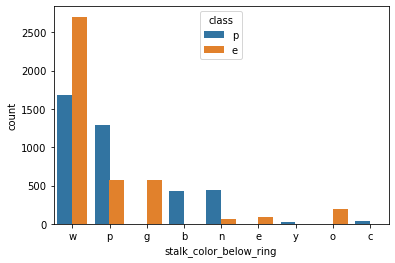

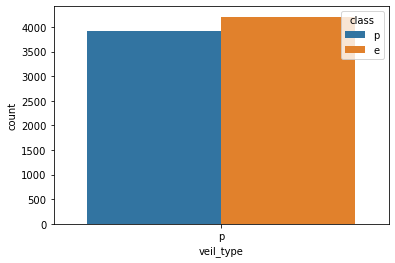

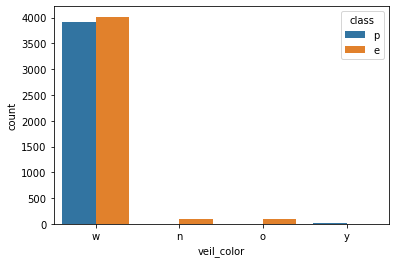

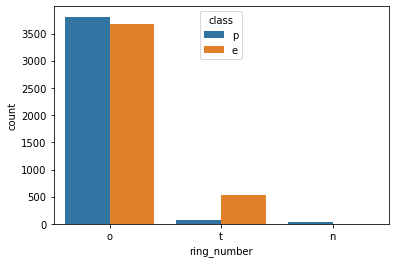

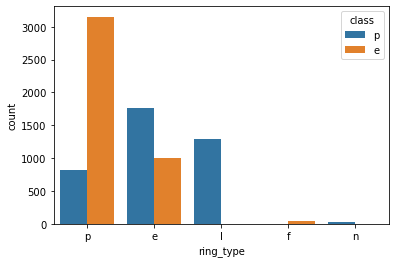

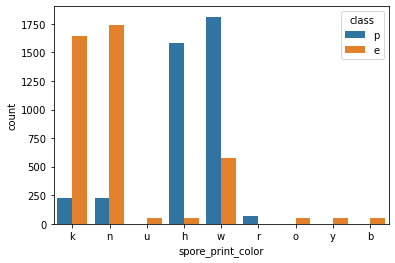

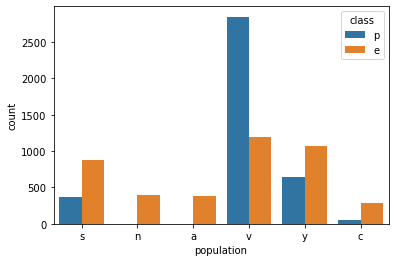

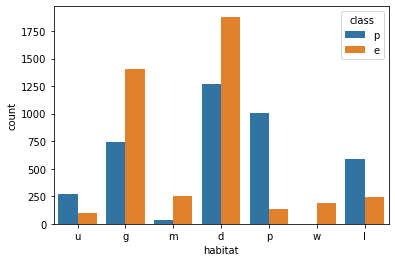

In [11]:
# Step 6: Loop through the columns and plot countplots
for columns in df.columns:
    sns.countplot(x=columns, hue="class", data = df)
    plt.show()
    

## Part III

### Introduction
In Part II, we performed simple exploratory data analysis to investigate patterns in the data. 

If you have noticed, our columns contain nothing but strings. We will need to prepare the data that is suitable for training, by dummifying the string values.

### What is dummification?
For one-hot encoding/dummification of the categorical values, there are various ways to do it. 

However, no matter which method you do it, make sure you drop one column to avoid the <strong>dummy variable trap</strong>.

For example, if your column contains four categorical values, you'd have to drop one of the four columns after one-hot encoding.

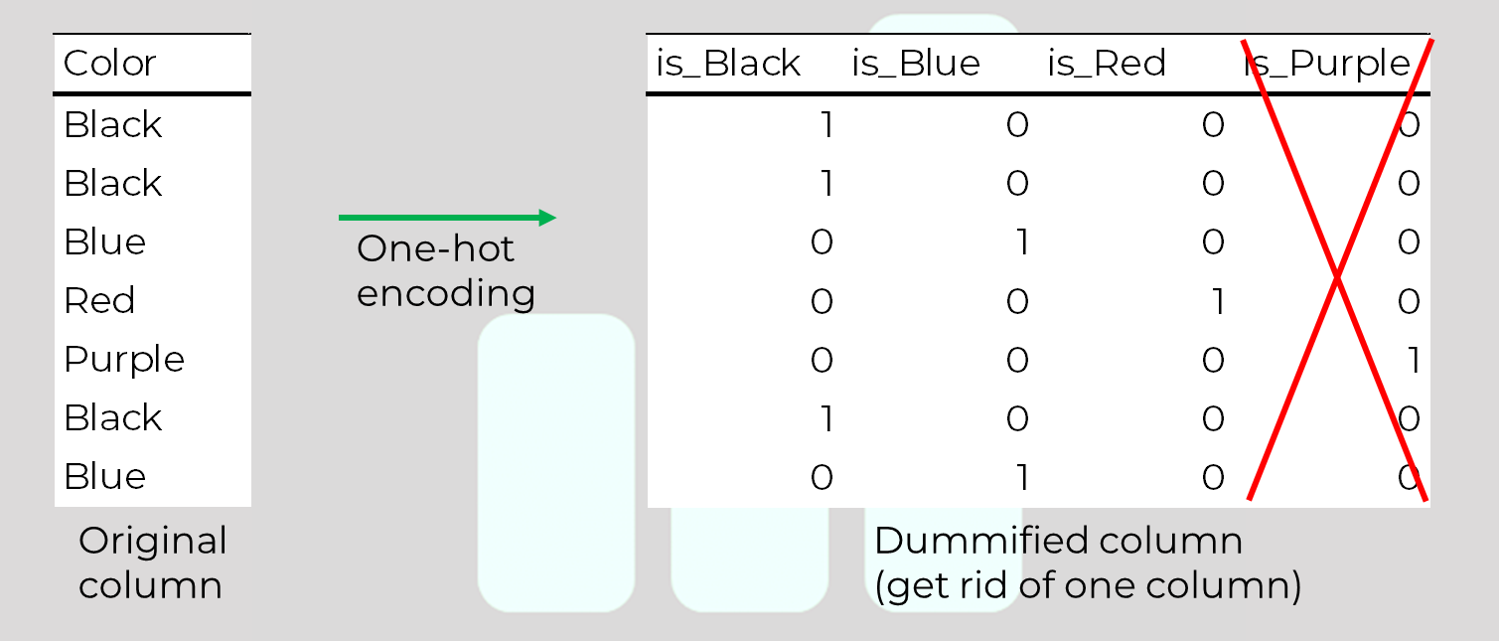

In this example, we drop is_Purple because is_Purple is redundant, i.e. you can infer that row's values based on is_Black, is_Blue, and is_Red. If all of those values are 0, it means the row contains purple instead.

Suggested reading: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

### Step 1: Import pandas
Let's start with importing pandas to read our CSV from Part I.

In [12]:
# Step 1: Import pandas as pd
import pandas as pd

### Step 2: Read the CSV from Part I as DataFrame
We will now read the data that we exported from Part I.

In [13]:
# Step 2: Read your file from Part I
df = pd.read_csv('data.csv')
df

,class,cap_shape,cap_surface,cap_color,isBruised,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Step 3: Turn 'class' values into binary values
Before we do anything, let's turn the values in 'class' column into binary form. 

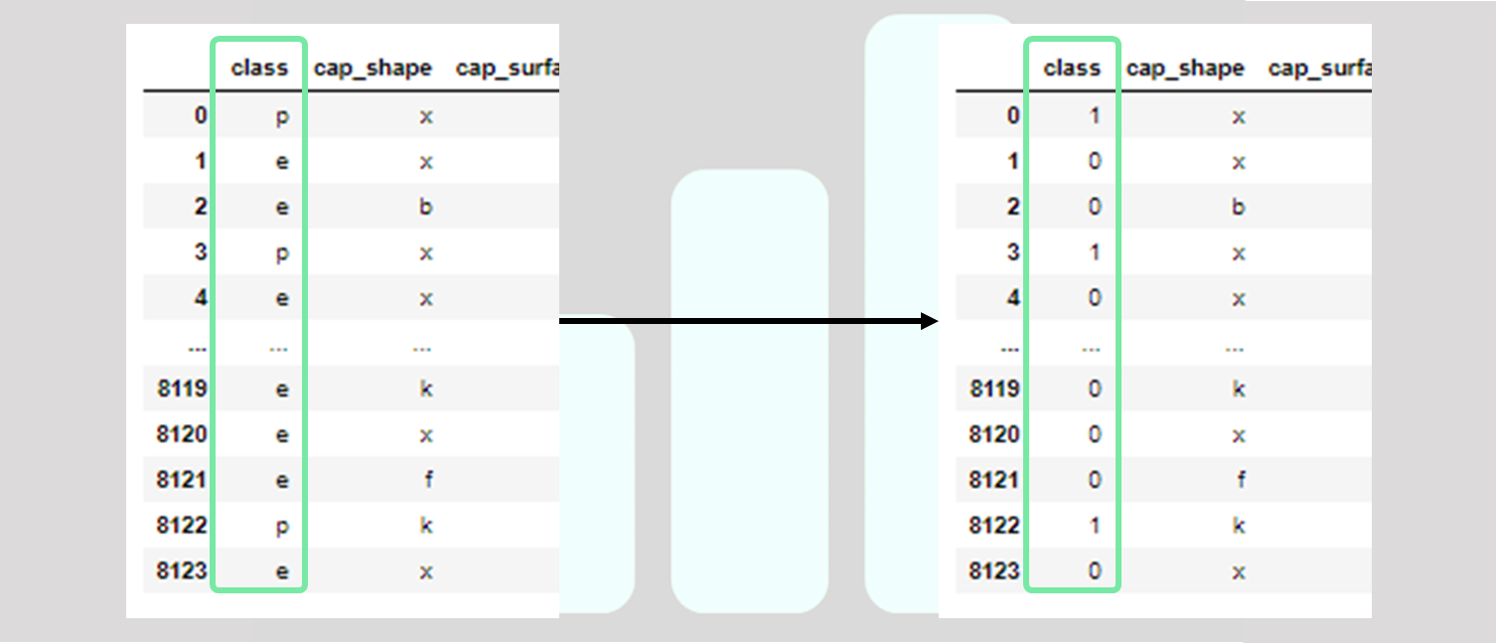

Here's what we need to change first:
1. p -> 1
2. e -> 0

There are many ways to do this, and here are some recommendations:
1. using a for loop to loop through 'class', and using if/else to append the binaries into a list to replace 'class'
2. LabelEncoder from sklearn.preprocessing
3. pd.get_dummies(), and using the results to replace 'class'



In [14]:
import numpy as np
# Step 4: Turn the values in 'class' into binaries
class_list = []
for i in df['class']:
    if i == 'p':
        class_list.append(1)
    else:
        class_list.append(0)
df['class'] = class_list

### Step 5: Dummify the rest of the DataFrame
Now that you're done transforming the 'class' column, it's time to transform the rest of the columns.

We will be using pandas get_dummies method to one-hot encode the columns, along with dropping the first column. This results in this:

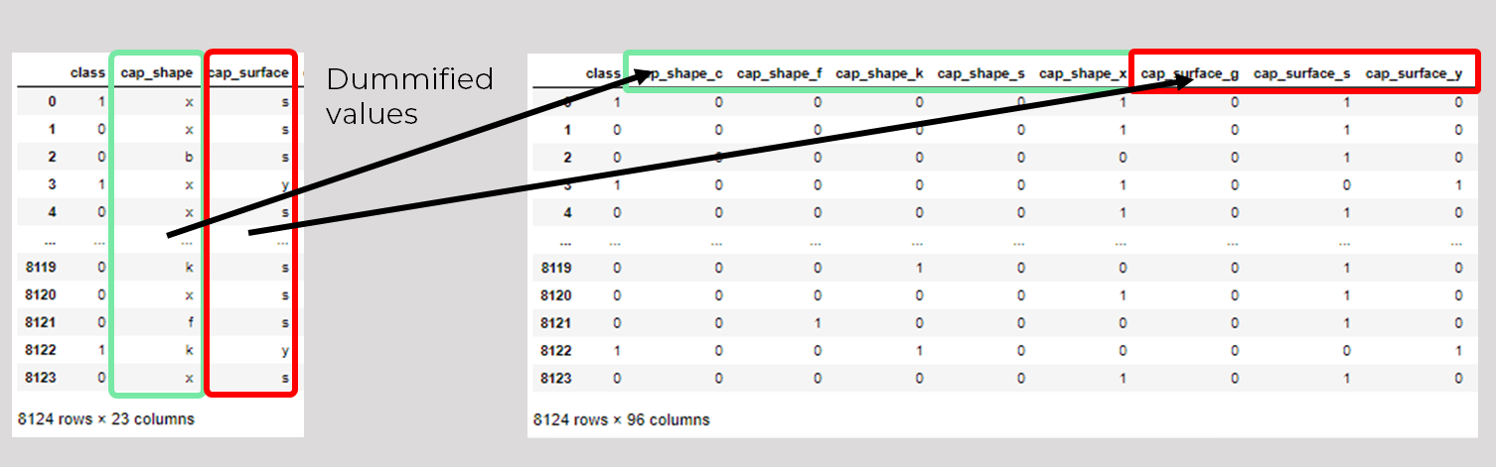

Don't worry about 'class' column - nothing will happen to that column since it's already in binary form so you can dummify the entire DataFrame.

At the end, you will have a DataFrame that is:
1. 8,124 rows
2. 96 columns

<strong>Hint: Don't forget to drop_first = True</strong>

In [15]:
# Step 5: Dummify your DataFrame
df = pd.get_dummies(df, prefix=['cap_shape',
                'cap_surface',
                'cap_color',
                'isBruised',
                'odor',
                'gill_attachment',
                'gill_spacing',
                'gill_size',
                'gill_color',
                'stalk_shape',
                'stalk_root',
                'stalk_surface_above_ring',
                'stalk_surface_below_ring',
                'stalk_color_above_ring',
                'stalk_color_below_ring',
                'veil_type',
                'veil_color',
                'ring_number',
                'ring_type',
                'spore_print_color',
                'population',
                'habitat'], drop_first = True)
df

,class,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


### Step 6: Export dummy DataFrame 
Now that you've dummified all of your columns, you can finally export the DataFrame into a CSV.

In [16]:
# Step 6: Export DataFrame into a CSV
df.to_csv('data_dummy.csv',index=False)

## Part IV
In the final part, we perform machine learning to predict whether a mushroom is poisonous or otherwise. 

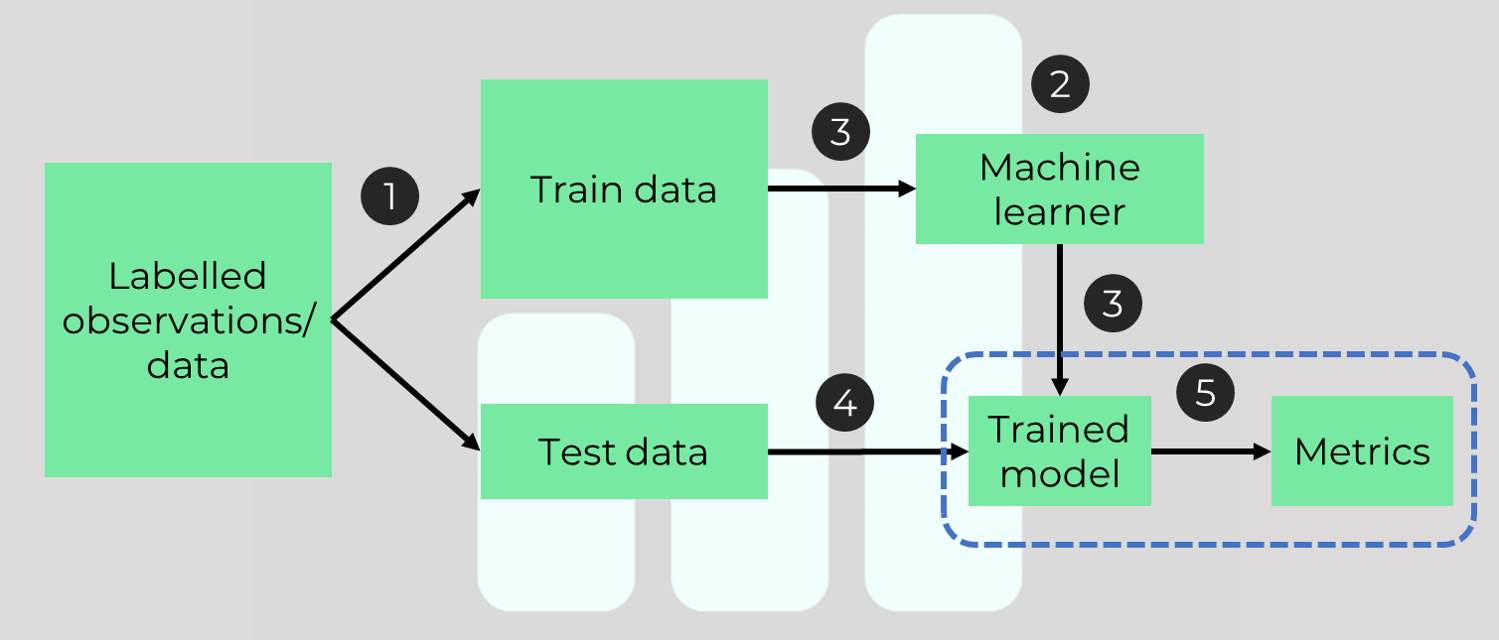


Generally, the machine learning process has five parts:
1. <strong>Split your data into train and test set</strong>
2. <strong>Model creation</strong>
<br>
Import your models from sklearn and instantiate them (assign model object to a variable)
3. <strong>model fitting</strong>
<br>
Fit your training data into the model and train train train
4. <strong>model prediction</strong>
<br>
Make a set of predictions using your test data, and
5. <strong>Model assessment</strong>
<br>
Compare your predictions with ground truth in test data

Highly recommended readings:
1. [Important] https://scipy-lectures.org/packages/scikit-learn/index.html
2. https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
3. https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### Step 1: Import your librarys
We will be using models from sklearn - a popular machine learning library. However, we won't import everything from sklearn and take just what we need. 

We'll need to import plotting libraries to plot our predictions against the ground truth (test data). 

Import the following first:
1. pandas

In [17]:
# Step 1: Import the library
import pandas as pd
import numpy as np

### Step 2: Read the CSV from Part III
We will now read the CSV that we exported from Part III containing the dummified values.

In [18]:
# Step 2: Read the CSV from Part III
df = pd.read_csv('data_dummy.csv')
df

,class,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


### Step 3: Import the machine learning libraries
Let's import the following machine learning libraries as well:
1. train_test_split from sklearn.model_selection
2. LogisticRegression from sklearn.linear_model
3. DecisionTreeClassifier from sklearn.tree
4. f1_score from sklearn.metrics
5. confusion_matrix from sklearn.metrics

In [19]:
# Step 3: Import the next set of libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import f1_score 
from sklearn.metrics import confusion_matrix  

### Step 4: Prepare your independent and dependent variables
Now that we have everything done, let's prepare our independent variables (the dummified physical characteristics) and the dependent variable (edible/poison binary). 

1. Declare a variable, and assign your independent variables to it, i.e. drop "class" from the DataFrame from Step 3
2. Declare a variable, and assign only values from "class"

In [20]:
# Step 4: Prepare your independent and dependent variables
X = df.drop(columns = ['class'])
y = df['class']

### Step 5: Split your indepedent and dependent variables into train and test sets
We'll be using a 80/20 split for train and test set respectively, using the train_test_split function, stratified by y. 

In [21]:
# Step 5: Split your data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

### Step 6: Train your machine learning model
Once you've split your data, machine learning begins. 

This is what you'll need to do:
1. Start with a model
2. Declare a variable, and store your model in it (don't forget to use brackets)
3. Fit your training data into the instantiated model
4. Declare a variable that contains predictions from the model you just trained, using the train dataset (X_test)

Also, the recommended readings will be very helpful.

We will start with LogisticRegression.

In [22]:
# Step 6a: Declare a variable to store the LogisticRegression model
logistic_regression = LogisticRegression()
# Step 6b: Fit your train dataset
logistic_regression.fit(X_train,y_train)
# Step 6c: Declare a variable and store your predictions that you make with your model using X test data
y_pred = logistic_regression.predict(X_test)
# Step 6d: Print the f1_score between the y test and prediction
print(f1_score(y_test, y_pred))
# Step 6e: Print the confusion matrix using the y test and prediction
confusion_matrix = pd.crosstab(y_test, y_pred, rownames =['Actual'], colnames = ['Predicted'])
print(confusion_matrix)

1.0
Predicted    0    1
Actual             
0          842    0
1            0  783


### Step 7: Train a DecisionTree model
Wait what? If you did things correctly, you shoud get a perfect result.

While this is great, it's still important to try other models and see if they perform similarly. 

Let's go with DecisionTree next. 

In [24]:
# Step 7a: Declare a variable to store the DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier()
# Step 7b: Fit your train dataset
decision_tree.fit(X_train,y_train)
# Step 7c: Declare a variable and store your predictions that you make with your model using X test data
y_pred = decision_tree.predict(X_test)
# Step 7d: Print the f1_score between the y test and prediction
print(f1_score(y_test, y_pred))
# Step 7e: Print the confusion matrix using the y test and prediction
confusion_matrix = pd.crosstab(y_test, y_pred, rownames =['Actual'], colnames = ['Predicted'])
print(confusion_matrix)

1.0
Predicted    0    1
Actual             
0          842    0
1            0  783


### Step 8: Get feature_importances of your DecisionTree model
Wow ok, another perfect model. Let's take a look under the hood and see what's driving the 'decisions' in the DecisionTreeClassifier. 

Create a DataFrame using the train data's columns, and the .feature_importances_ attribute in the model. This will show you a table containing the feature names and their importance in the model. 

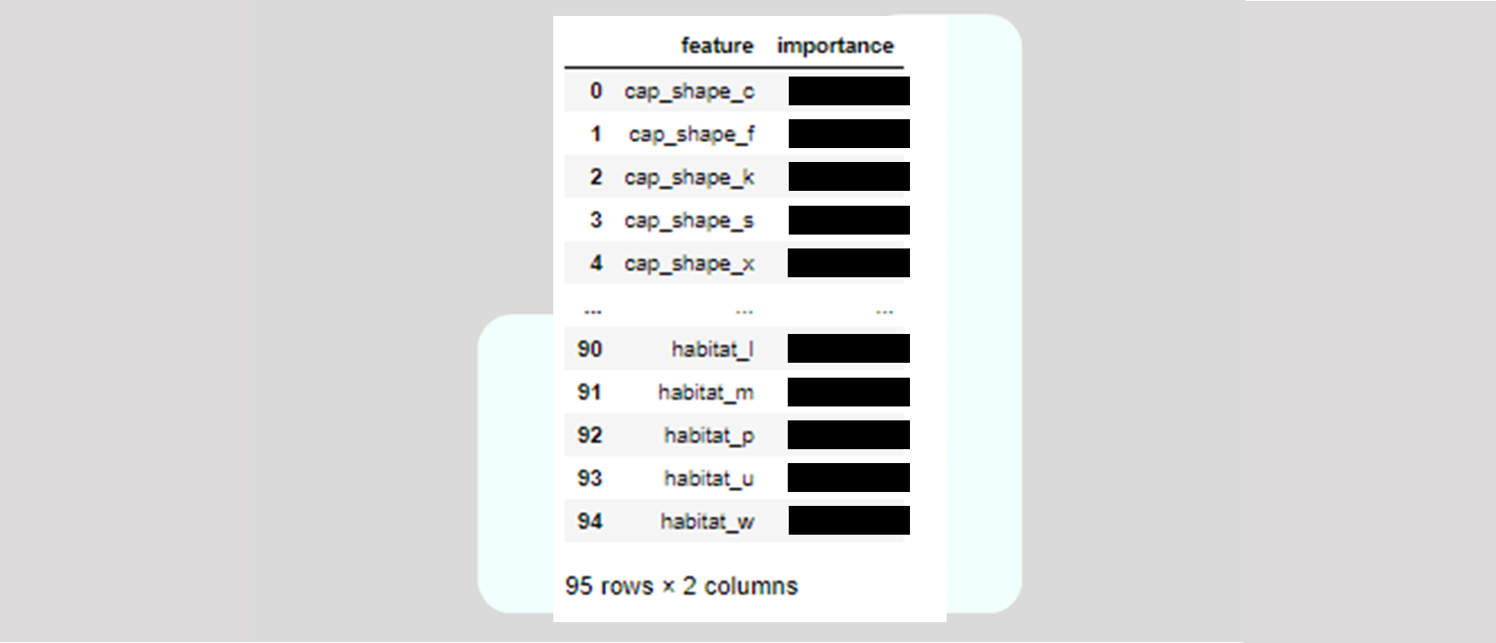

In [25]:
# Step 8: Get feature importances of the DecisionTree model

In [26]:
# to drop the first columns to make the length of features and importance the same
df = df.drop(columns = ['class'])

In [27]:
importance = decision_tree.feature_importances_
feature = np.array(df.columns)
print(len(importance))
print(len(feature))

95
95


In [28]:
data = {'feature': feature,
         'importance': importance}

df = pd.DataFrame(data, columns = ['feature','importance'])
df


,feature,importance
0,cap_shape_c,0.000615
1,cap_shape_f,0.000000
2,cap_shape_k,0.000000
3,cap_shape_s,0.000000
4,cap_shape_x,0.000000
...,...,...
90,habitat_l,0.000000
91,habitat_m,0.000000
92,habitat_p,0.000000
93,habitat_u,0.000000


### Step 9: Sort your feature importance DataFrame
If you haven't done so, you can sort your DataFrame in a descending order and take the first 20 rows so that you can identify the top features used.



In [29]:
# Step 9: Sort your DataFrame by feature importances
df= df.sort_values(by = 'importance', ascending = False)
df.head(20)

,feature,importance
22,odor_n,0.615966
42,stalk_root_c,0.173798
50,stalk_surface_below_ring_y,0.101296
80,spore_print_color_r,0.033476
81,spore_print_color_u,0.024297
57,stalk_color_above_ring_w,0.017749
20,odor_l,0.011483
18,odor_c,0.009731
88,population_y,0.006002
27,gill_spacing_w,0.002513


Looks like there's a feature that is the most useful in building the tree, seems like odor is the most crucial feature in determining whether or not a mushroom is edible or not.

## Interpreting the significance of your model
While we have achieved the best case scenario, i.e. training the perfect model, it's important to understand the significance of your work.

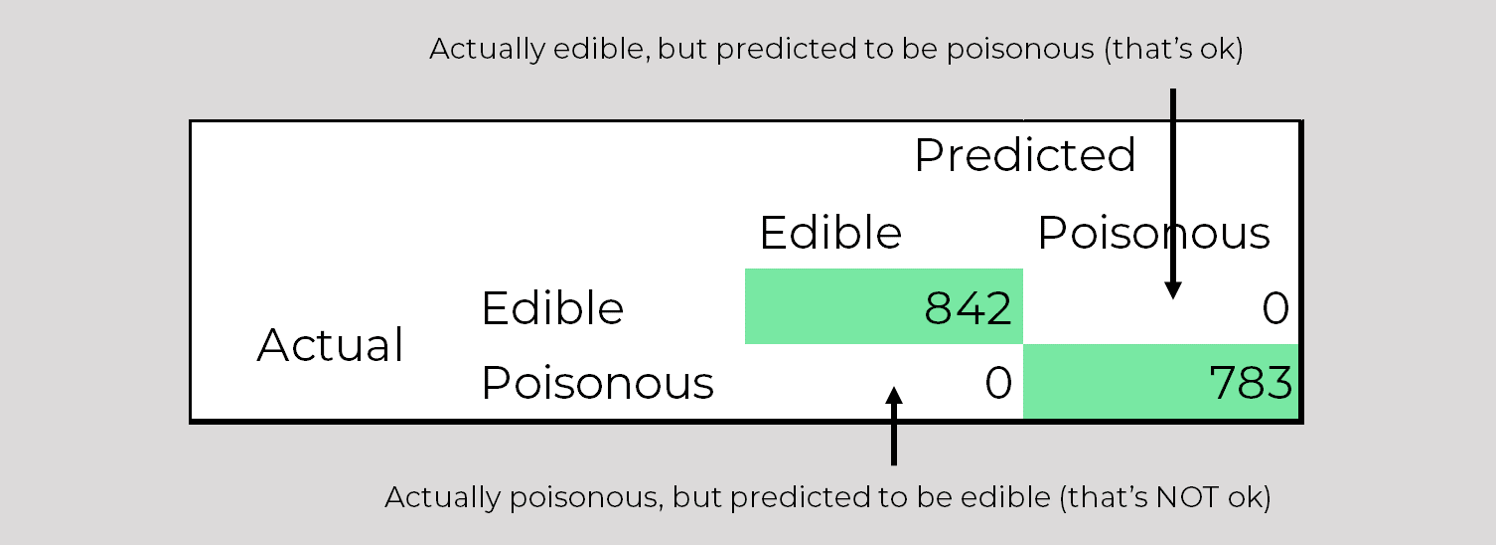

In the business context, it's important to consider the implication of one's work. 

In our case, one error is more significant than another. If you classified a mushroom as poisonous when it is not, it's fine. However, if you classified a poisonous mushroom as edible, it'd spell big trouble for you.

## Tree visualization


### Step 10: Visualize the tree using export_graphviz
If your scikit-learn is not the latest version, or you have trouble importing sklearn.tree, no worries.

Here are the steps:
1. from sklearn.tree import export_graphviz
2. print the results of export_graphviz function of your tree
3. copy and paste the printed results onto an online Graphviz viewer

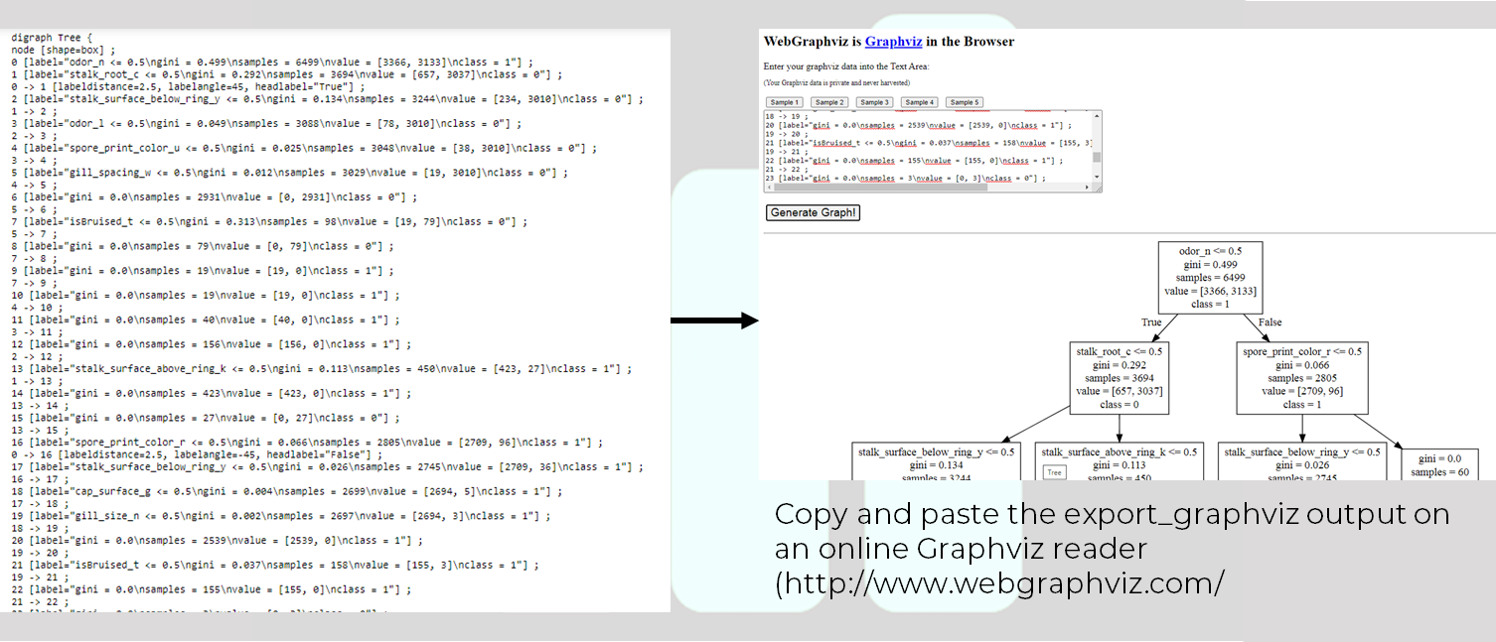

In [30]:
# Step 10a: Import export_graphviz from sklearn.tree 
from sklearn import tree
from sklearn.tree import export_graphviz

In [31]:
# Step 10b: Print the export_graphviz output for your tree
print(tree.export_graphviz(decision_tree))
# Step 10c: Copy the print output and find an online Graphviz viewer and paste the output there

digraph Tree {
node [shape=box] ;
0 [label="X[22] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3366, 3133]"] ;
1 [label="X[42] <= 0.5\ngini = 0.289\nsamples = 3682\nvalue = [644, 3038]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[50] <= 0.5\ngini = 0.136\nsamples = 3245\nvalue = [238, 3007]"] ;
1 -> 2 ;
3 [label="X[81] <= 0.5\ngini = 0.05\nsamples = 3087\nvalue = [80, 3007]"] ;
2 -> 3 ;
4 [label="X[20] <= 0.5\ngini = 0.025\nsamples = 3046\nvalue = [39, 3007]"] ;
3 -> 4 ;
5 [label="X[27] <= 0.5\ngini = 0.013\nsamples = 3027\nvalue = [20, 3007]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 2932\nvalue = [0, 2932]"] ;
5 -> 6 ;
7 [label="X[18] <= 0.5\ngini = 0.332\nsamples = 95\nvalue = [20, 75]"] ;
5 -> 7 ;
8 [label="gini = 0.0\nsamples = 20\nvalue = [20, 0]"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 75\nvalue = [0, 75]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 19\nvalue = [19, 0]"] ;
4 -> 10 ;
11 [label="gini = 0.0\nsamples = 41\nvalue = [41, 0]"] 

### Step 11: Vizualize the tree using plot_tree function
This is only applicable to you if you've updated your version of Python and scikit-learn to the latest version (don't be stressed if you don't - you can leave this completely empty).

Here are the steps:
1. import plot_tree from sklearn.tree
2. import matplotlib.pyplot as plt
3. plot your tree using plot_tree function

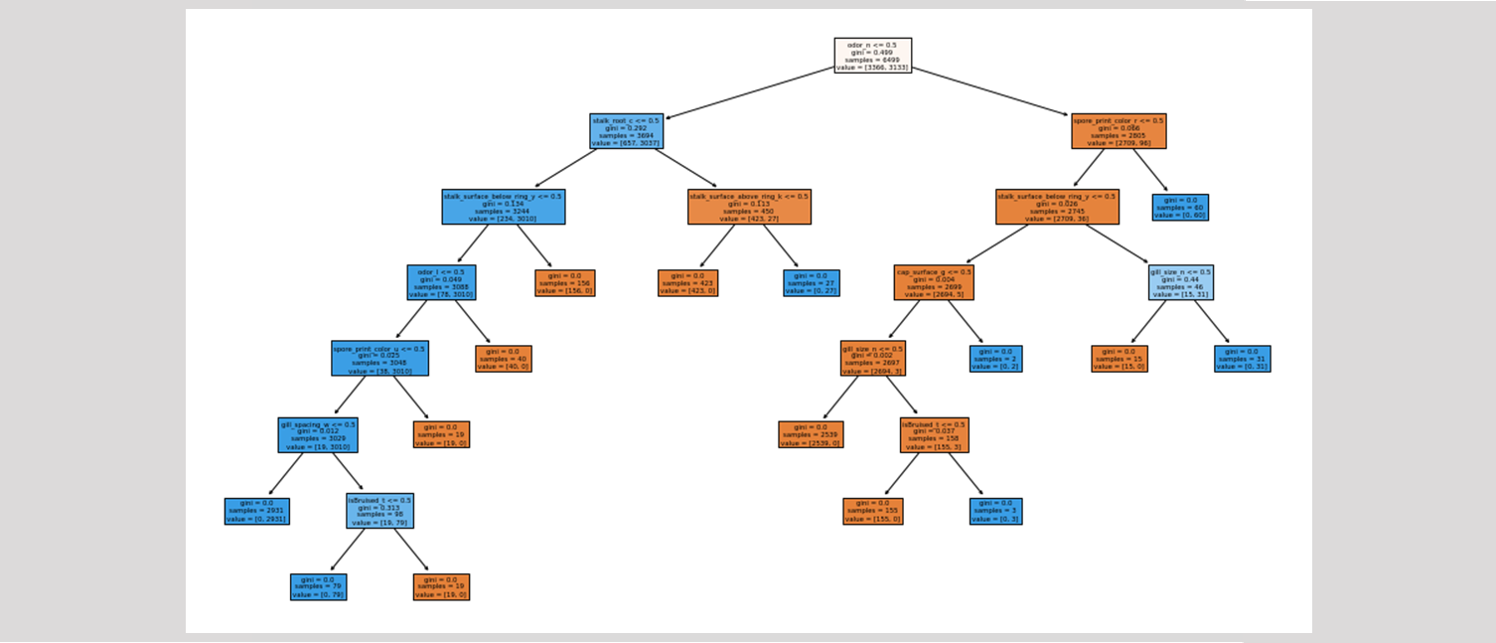

You will see something like this!

In [32]:
# Step 11a: Import your libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

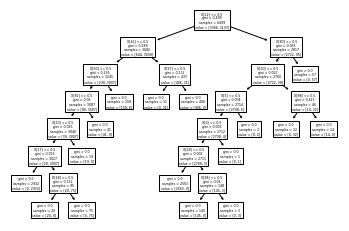

In [33]:
# Step 11b: Use the plot_tree function to plot your tree
tree.plot_tree(decision_tree)
plt.show

# The end
And that's the end! To recap, we've:
1. Collected mushroom data and prepared it for analysis
2. Performed exploratory data analysis
3. Engineered new features
5. Trained a machine learning model to predict mushroom edibility
6. Visualized a DecisionTreeClassifier model



You trained an absolutely perfect model, and no one will get poisoned when they go out into the wild with your model.